Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Core Tasks

## Task 1. Simulate and visualise the signal evolution over time

Define models in functions

In [3]:
def simulate_single_fat_peak(t, rho_W, rho_F, f_F, R2_star=None):
    """
    Simulate the signal for a single fat peak model.
    
    Parameters:
        t (np.array): Time vector in seconds.
        rho_W (float): Water amplitude.
        rho_F (float): Fat amplitude.
        f_F (float): Fat frequency in Hz.
        R2_star (float, optional): R2* decay constant (s^-1). If None, no decay is applied.
    
    Returns:
        np.array: Complex-valued signal.
    """
    # Basic signal without decay
    S = rho_W + rho_F * np.exp(1j * 2 * np.pi * f_F * t)
    # Apply R2* decay if provided
    if R2_star is not None:
        S *= np.exp(-t * R2_star)
    return S

def simulate_multi_peak(t, rho_W, rho_F, r, f_F_m, R2_star=None):
    """
    Simulate the signal for a multiple fat peaks model.
    
    Parameters:
        t (np.array): Time vector in seconds.
        rho_W (float): Water amplitude.
        rho_F (float): Fat amplitude.
        r (np.array): Relative amplitudes of each fat spectral component.
        f_F_m (np.array): Frequencies for each fat component in Hz.
        R2_star (float, optional): R2* decay constant (s^-1). If None, no decay is applied.
    
    Returns:
        np.array: Complex-valued signal.
    """
    fat_signal = np.zeros_like(t, dtype=complex)
    for m in range(len(r)):
        fat_signal += r[m] * np.exp(1j * 2 * np.pi * f_F_m[m] * t)
    S = rho_W + rho_F * fat_signal
    if R2_star is not None:
        S *= np.exp(-t * R2_star)
    return S

Define Simulation Parameters

In [9]:
# Time vector: echoes acquired every 0.01 ms from 0 to 10 ms
t = np.linspace(0, 0.01, 1000)  # in seconds

# Signal amplitudes (assuming a PDFF of 30%)
rho_W = 0.7
rho_F = 0.3

# For single fat peak model
f_F = -0.45e3  # -450 Hz

# For multiple fat peaks model (6-peak model)
r = np.array([0.087, 0.694, 0.128, 0.004, 0.039, 0.048])
f_F_m = np.array([-0.498, -0.447, -0.345, -0.261, -0.063, 0.064]) * 1e3  # Convert kHz to Hz

# R2* decay parameter (for demonstration)
R2_star = 50  # s^-1

Simulate the signals

In [10]:
# Without R2* decay (i.e., R2_star not provided)
S_single_no_decay = simulate_single_fat_peak(t, rho_W, rho_F, f_F)
S_multi_no_decay  = simulate_multi_peak(t, rho_W, rho_F, r, f_F_m)

# With R2* decay (R2_star provided)
S_single_decay = simulate_single_fat_peak(t, rho_W, rho_F, f_F, R2_star)
S_multi_decay  = simulate_multi_peak(t, rho_W, rho_F, r, f_F_m, R2_star)

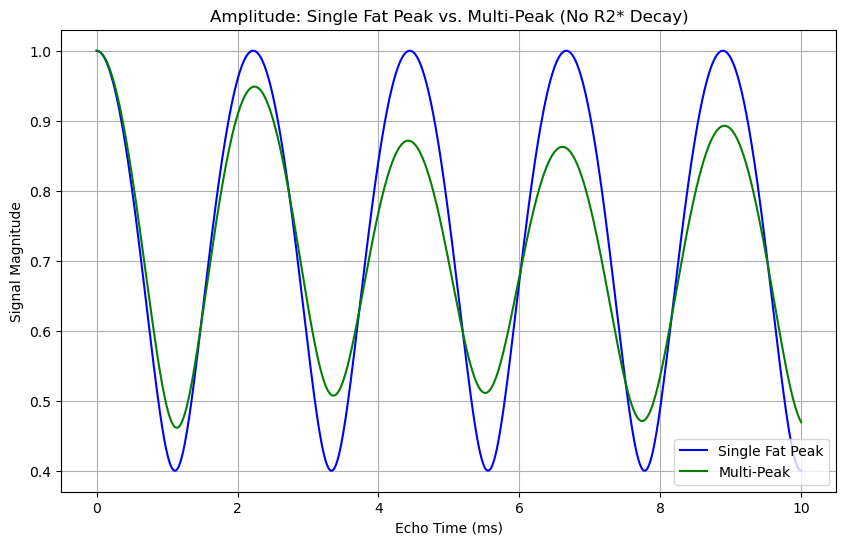

In [11]:
# ----------------------------
# Combined Amplitude Plot for Single Fat Peak vs. Multi-Peak (No R2* Decay)
# ----------------------------
plt.figure(figsize=(10, 6))
plt.plot(t * 1e3, np.abs(S_single_no_decay), label="Single Fat Peak", color="blue")
plt.plot(t * 1e3, np.abs(S_multi_no_decay), label="Multi-Peak", color="green")
plt.xlabel("Echo Time (ms)")
plt.ylabel("Signal Magnitude")
plt.title("Amplitude: Single Fat Peak vs. Multi-Peak (No R2* Decay)")
plt.legend()
plt.grid(True)
plt.show()

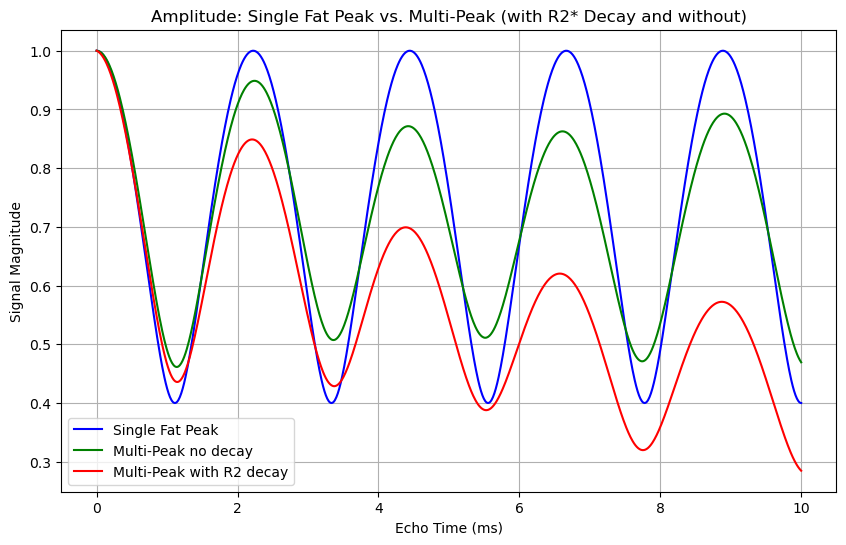

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(t * 1e3, np.abs(S_single_no_decay), label="Single Fat Peak", color="blue")
plt.plot(t * 1e3, np.abs(S_multi_no_decay), label="Multi-Peak no decay", color="green")
plt.plot(t * 1e3, np.abs(S_multi_decay), label="Multi-Peak with R2 decay", color="red")
plt.xlabel("Echo Time (ms)")
plt.ylabel("Signal Magnitude")
plt.title("Amplitude: Single Fat Peak vs. Multi-Peak (with R2* Decay and without)")
plt.legend()
plt.grid(True)
plt.show()

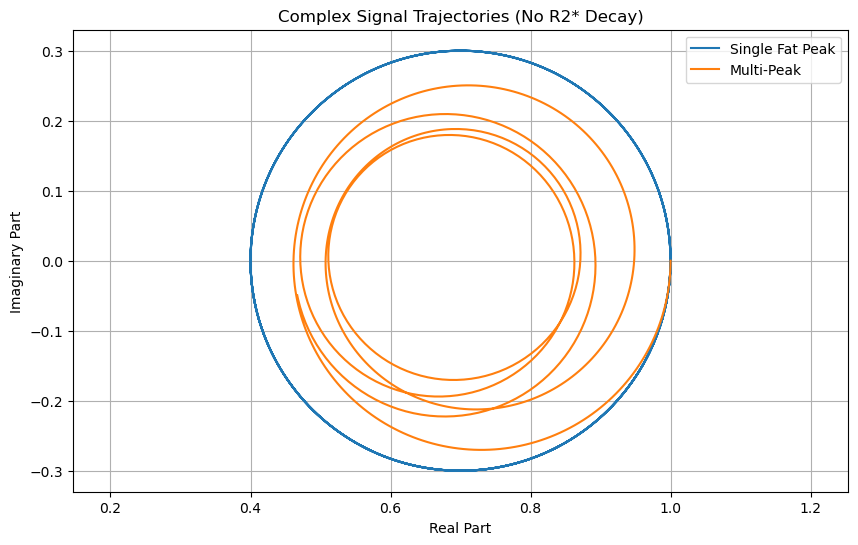

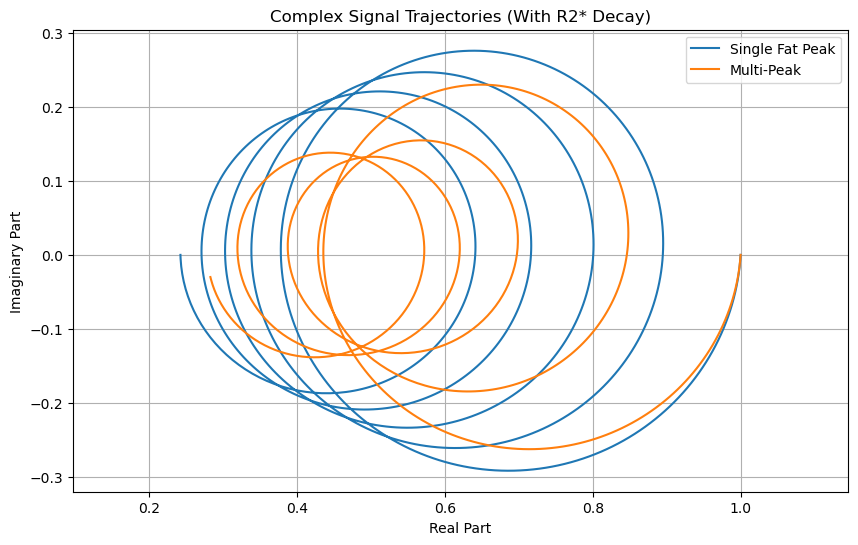

In [9]:

# ----------------------------
# Plotting: Complex Signal Trajectories (Real vs. Imaginary)
# ----------------------------

# Without decay: compare both models on one plot
plt.figure(figsize=(10, 6))
plt.plot(np.real(S_single_no_decay), np.imag(S_single_no_decay), label="Single Fat Peak")
plt.plot(np.real(S_multi_no_decay),  np.imag(S_multi_no_decay),  label="Multi-Peak")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.title("Complex Signal Trajectories (No R2* Decay)")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()

# With decay: compare both models on one plot
plt.figure(figsize=(10, 6))
plt.plot(np.real(S_single_decay), np.imag(S_single_decay), label="Single Fat Peak")
plt.plot(np.real(S_multi_decay),  np.imag(S_multi_decay),  label="Multi-Peak")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.title("Complex Signal Trajectories (With R2* Decay)")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()

## Task 2. Understanding and resolving fat-water ambiguity

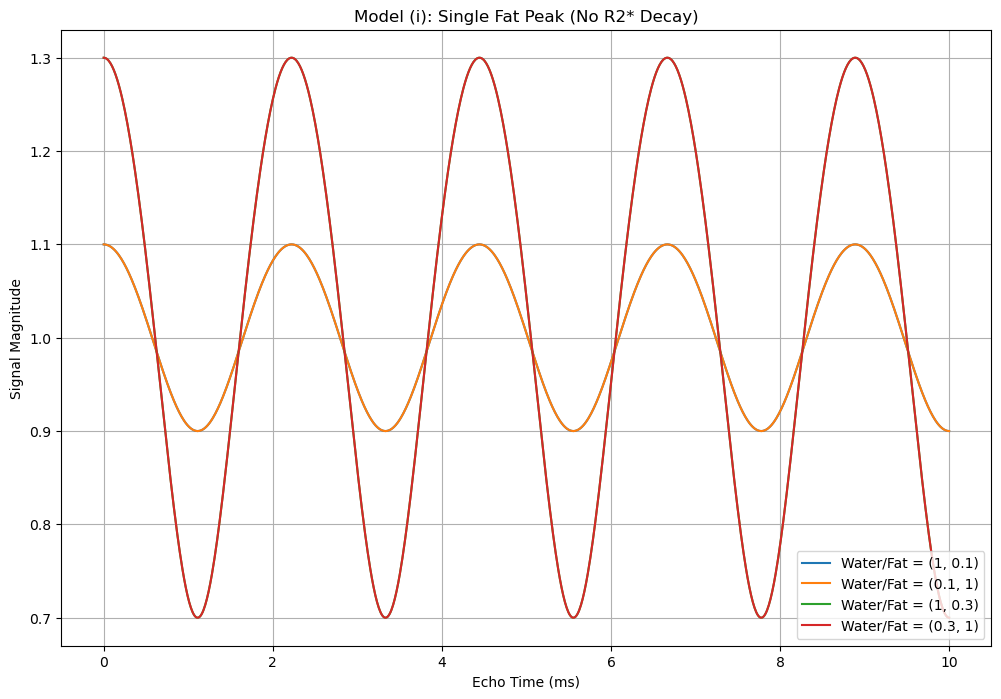

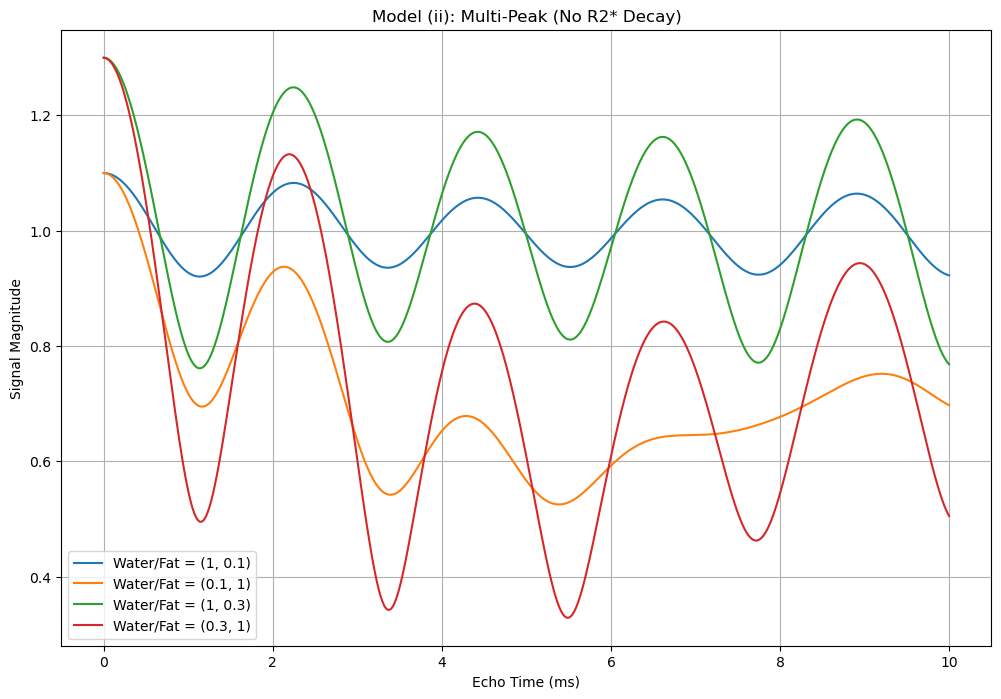

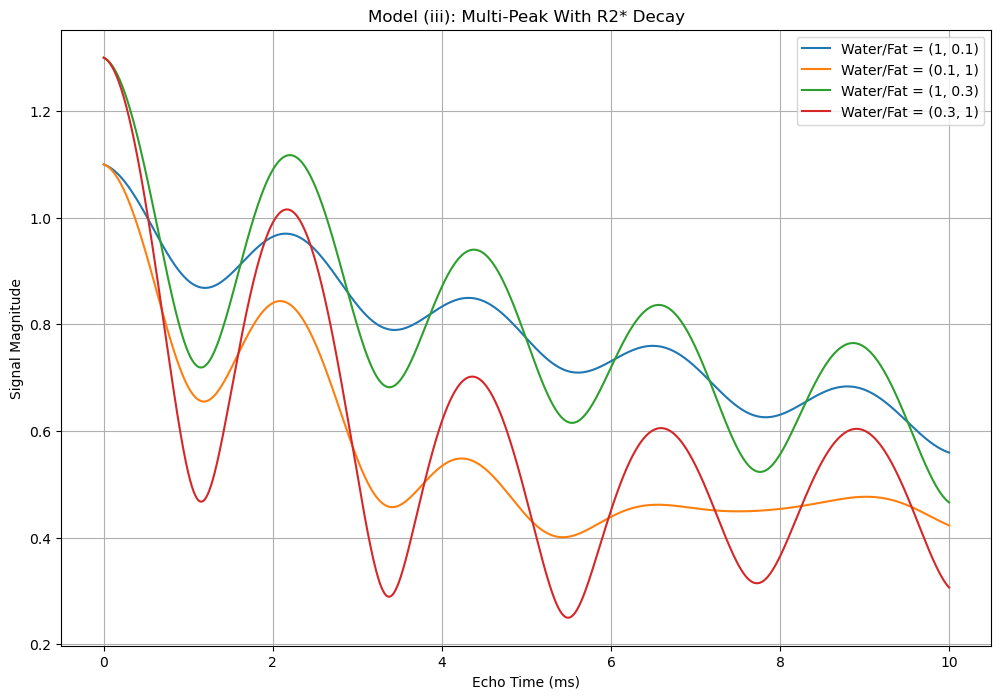

In [10]:
# For single fat peak model (model (i))
f_F = -0.45e3  # Fat frequency in Hz (-450 Hz)

# For multi-peak models (models (ii) and (iii))
r = np.array([0.087, 0.694, 0.128, 0.004, 0.039, 0.048])
f_F_m = np.array([-0.498, -0.447, -0.345, -0.261, -0.063, 0.064]) * 1e3  # Convert kHz to Hz

# R2* decay parameter (for demonstration in model (iii))
R2_star = 50  # s^-1

# Define the amplitude pairs for water and fat:
amplitude_pairs = [(1, 0.1), (0.1, 1), (1, 0.3), (0.3, 1)]
labels = ["(1, 0.1)", "(0.1, 1)", "(1, 0.3)", "(0.3, 1)"]

# ----------------------------
# Model (i): Simple Model (Single Fat Peak, No Decay)
# ----------------------------
plt.figure(figsize=(12, 8))
for i, (rho_W, rho_F) in enumerate(amplitude_pairs):
    S = simulate_single_fat_peak(t, rho_W, rho_F, f_F)
    plt.plot(t * 1e3, np.abs(S), label=f"Water/Fat = {labels[i]}")
plt.xlabel("Echo Time (ms)")
plt.ylabel("Signal Magnitude")
plt.title("Model (i): Single Fat Peak (No R2* Decay)")
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# Model (ii): Multi-Peak Model Without R2* Decay
# ----------------------------
plt.figure(figsize=(12, 8))
for i, (rho_W, rho_F) in enumerate(amplitude_pairs):
    S = simulate_multi_peak(t, rho_W, rho_F, r, f_F_m)
    plt.plot(t * 1e3, np.abs(S), label=f"Water/Fat = {labels[i]}")
plt.xlabel("Echo Time (ms)")
plt.ylabel("Signal Magnitude")
plt.title("Model (ii): Multi-Peak (No R2* Decay)")
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# Model (iii): Multi-Peak Model With R2* Decay
# ----------------------------
plt.figure(figsize=(12, 8))
for i, (rho_W, rho_F) in enumerate(amplitude_pairs):
    S = simulate_multi_peak(t, rho_W, rho_F, r, f_F_m, R2_star)
    plt.plot(t * 1e3, np.abs(S), label=f"Water/Fat = {labels[i]}")
plt.xlabel("Echo Time (ms)")
plt.ylabel("Signal Magnitude")
plt.title("Model (iii): Multi-Peak With R2* Decay")
plt.legend()
plt.grid(True)
plt.show()

## Task 3. Fitting simulated data

<module 'matplotlib.pyplot' from 'd:\\anaconda\\envs\\dl_cw2\\Lib\\site-packages\\matplotlib\\pyplot.py'>

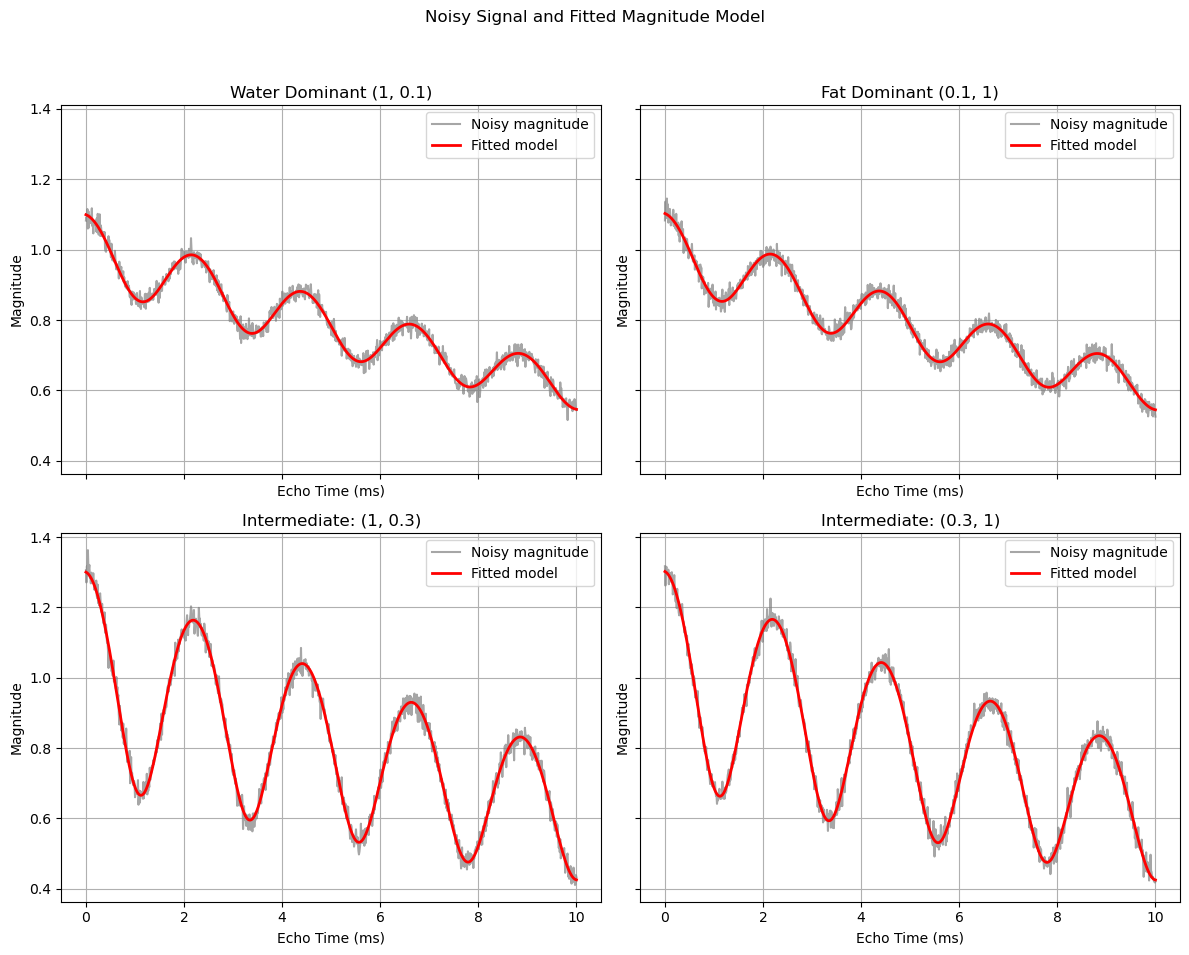

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# ----------------------------
# Simulation functions
# ----------------------------
def simulate_simple_signal(t, rho_W, rho_F, f_F, R2_star=None):
    """
    Simulate the simple model (i) signal.
    S(t) = rho_W + rho_F * exp(i*2*pi*f_F*t)
    Optionally include exponential decay with rate R2_star.
    """
    S = rho_W + rho_F * np.exp(1j * 2 * np.pi * f_F * t)
    if R2_star is not None:
        S *= np.exp(-t * R2_star)
    return S

def add_noise_to_signal(S, SNR):
    """
    Add complex Gaussian noise to the signal S.
    SNR is defined as: (peak amplitude) / noise_std.
    Noise is added independently to real and imaginary parts.
    The peak amplitude is taken at t=0 (|S(0)|).
    """
    peak_amp = np.abs(S[0])
    noise_std = peak_amp / SNR
    noise = np.random.normal(0, noise_std, size=S.shape) + 1j*np.random.normal(0, noise_std, size=S.shape)
    return S + noise

# ----------------------------
# Fitting function
# ----------------------------
def magnitude_model(t, rho_W, rho_F, R2_star, f_F):
    """
    Model for the magnitude of the signal:
    M(t) = sqrt(rho_W^2 + rho_F^2 + 2*rho_W*rho_F*cos(2*pi*f_F*t)) * exp(-t*R2_star)
    
    f_F is fixed (known) and is passed as a parameter.
    """
    # Compute the instantaneous interference term from water and fat
    interference = np.sqrt(rho_W**2 + rho_F**2 + 2 * rho_W * rho_F * np.cos(2 * np.pi * f_F * t))
    return interference * np.exp(-t * R2_star)

def estimate_parameters(t, mag_signal, f_F):
    """
    Estimate the parameters (rho_W, rho_F, R2_star) by fitting the magnitude model
    to the noisy magnitude signal.
    """
    # Initial guess:
    # At t=0, M(0)=rho_W+rho_F, so we can split evenly.
    initial_rho_total = mag_signal[0]
    p0 = [initial_rho_total/2, initial_rho_total/2, 50]  # initial guess for R2_star ~50 s^-1

    # Set bounds: amplitudes must be positive and R2_star > 0
    bounds = ([0, 0, 0], [np.inf, np.inf, np.inf])
    
    # Use curve_fit to estimate the parameters
    popt, pcov = curve_fit(lambda t, a, b, r2: magnitude_model(t, a, b, r2, f_F),
                           t, mag_signal, p0=p0, bounds=bounds)
    return popt  # returns [rho_W, rho_F, R2_star]

# ----------------------------
# Simulation parameters
# ----------------------------
# Time vector: echoes acquired every 0.01 ms from 0 to 10 ms
t = np.linspace(0, 0.01, 1000)  # in seconds

# Fat frequency for simple model (i)
f_F = -0.45e3  # -450 Hz

# SNR
SNR = 70

# Voxel composition configurations: (rho_W, rho_F)
voxel_configs = [(1, 0.1), (0.1, 1), (1, 0.3), (0.3, 1)]
config_titles = ["Water Dominant (1, 0.1)",
                 "Fat Dominant (0.1, 1)",
                 "Intermediate: (1, 0.3)",
                 "Intermediate: (0.3, 1)"]

# ----------------------------
# Simulation, noise addition, and parameter estimation
# ----------------------------
results = {}
fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
axs = axs.flatten()

for idx, (rho_W, rho_F) in enumerate(voxel_configs):
    # Simulate the clean signal with R2* decay included (for fitting)
    # Here we assume the clean signal follows model (i) with decay.
    true_R2 = 50  # using the same value for simulation
    S_clean = simulate_simple_signal(t, rho_W, rho_F, f_F, R2_star=true_R2)
    
    # Add noise
    S_noisy = add_noise_to_signal(S_clean, SNR)
    
    # Take magnitude for fitting
    mag_signal = np.abs(S_noisy)
    
    # Fit the magnitude model to estimate parameters
    est_rho_W, est_rho_F, est_R2_star = estimate_parameters(t, mag_signal, f_F)
    results[config_titles[idx]] = {
        "True rho_W": rho_W,
        "True rho_F": rho_F,
        "True R2*": true_R2,
        "Estimated rho_W": est_rho_W,
        "Estimated rho_F": est_rho_F,
        "Estimated R2*": est_R2_star
    }
    
    # Plot the noisy magnitude and fitted model
    fitted_mag = magnitude_model(t, est_rho_W, est_rho_F, est_R2_star, f_F)
    
    axs[idx].plot(t*1e3, mag_signal, label="Noisy magnitude", color="gray", alpha=0.7)
    axs[idx].plot(t*1e3, fitted_mag, label="Fitted model", color="red", linewidth=2)
    axs[idx].set_title(config_titles[idx])
    axs[idx].set_xlabel("Echo Time (ms)")
    axs[idx].set_ylabel("Magnitude")
    axs[idx].legend()
    axs[idx].grid(True)

plt.suptitle("Noisy Signal and Fitted Magnitude Model")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt



## Task 4.  Fit Real Data

Processing Phantom1 data...
Loaded data shape: (256, 256, 360)
Echo times (s): [0.001066 0.001066 0.001066 0.001066 0.001066 0.001066 0.001066 0.001066
 0.001066 0.001066 0.001066 0.001066 0.001066 0.001066 0.001066 0.001066
 0.001066 0.001066 0.001066 0.001066 0.001066 0.001066 0.001066 0.001066
 0.001066 0.001066 0.001066 0.001066 0.001066 0.001066 0.001066 0.001066
 0.001066 0.001066 0.001066 0.001066 0.001066 0.001066 0.001066 0.001066
 0.001066 0.001066 0.001066 0.001066 0.001066 0.001066 0.001066 0.001066
 0.001066 0.001066 0.001066 0.001066 0.001066 0.001066 0.001066 0.001066
 0.001066 0.001066 0.001066 0.001066 0.00199  0.00199  0.00199  0.00199
 0.00199  0.00199  0.00199  0.00199  0.00199  0.00199  0.00199  0.00199
 0.00199  0.00199  0.00199  0.00199  0.00199  0.00199  0.00199  0.00199
 0.00199  0.00199  0.00199  0.00199  0.00199  0.00199  0.00199  0.00199
 0.00199  0.00199  0.00199  0.00199  0.00199  0.00199  0.00199  0.00199
 0.00199  0.00199  0.00199  0.00199  0.00199  0.00

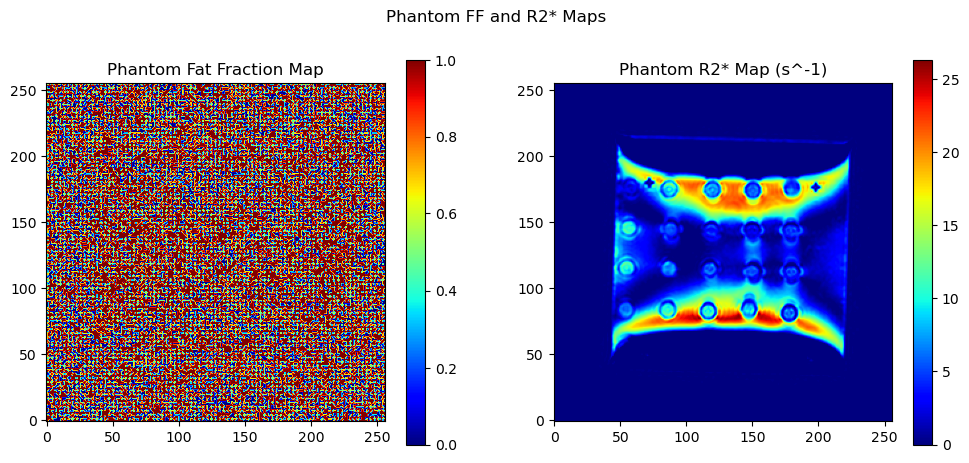

Processing Subject1 data...


ValueError: need at least one array to stack

In [2]:
import os
import glob
import numpy as np
import pydicom
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# =============================================================================
# 1. Function to load multi-echo DICOM data from a directory
# =============================================================================
def load_multi_echo_data(directory):
    """
    Loads all DICOM files in a directory and returns a 3D array (nx, ny, n_echoes)
    along with an array of echo times (in seconds). It assumes that each DICOM file
    contains a single 2D slice at one echo time.
    """
    # Find all .dcm files in the directory
    file_list = glob.glob(os.path.join(directory, "*.dcm"))
    dicom_data = []
    for fname in file_list:
        ds = pydicom.dcmread(fname)
        # Extract echo time (commonly stored in milliseconds)
        echo_time_ms = float(ds.EchoTime)
        echo_time_sec = echo_time_ms / 1000.0
        # Get image data as float32
        img = ds.pixel_array.astype(np.float32)
        dicom_data.append((echo_time_sec, img, fname))
    
    # Sort by echo time (ascending)
    dicom_data.sort(key=lambda x: x[0])
    echo_times = [item[0] for item in dicom_data]
    # Stack images along a new dimension (echo dimension)
    images = [item[1] for item in dicom_data]
    multi_echo_data = np.stack(images, axis=-1)
    return multi_echo_data, np.array(echo_times)

# =============================================================================
# 2. Define the magnitude model function
# =============================================================================
def magnitude_model(t, rhoW, rhoF, R2star, f_F):
    """
    Model for the magnitude of the simple water-fat signal with R2* decay:
        M(t) = sqrt(rhoW^2 + rhoF^2 + 2*rhoW*rhoF*cos(2*pi*f_F*t)) * exp(-R2star*t)
    Parameters:
      t       : Echo times (s)
      rhoW    : Water amplitude
      rhoF    : Fat amplitude
      R2star  : R2* decay rate (s^-1)
      f_F     : Fat frequency (Hz) (fixed, e.g., -450 Hz)
    """
    interference = np.sqrt(rhoW**2 + rhoF**2 + 2 * rhoW * rhoF * np.cos(2*np.pi*f_F*t))
    return interference * np.exp(-R2star * t)

# =============================================================================
# 3. Multi-start voxel-wise fitting routine
# =============================================================================
def fit_voxel_multistart(TE, voxel_mag, f_F, n_starts=10):
    """
    Fit the magnitude data of a single voxel (across echo times) using a multi-start
    strategy to robustly estimate (rhoW, rhoF, R2star).
    
    Parameters:
      TE        : Array of echo times (s)
      voxel_mag : Measured magnitude values at each echo time
      f_F       : Known fat frequency (Hz)
      n_starts  : Number of random initializations
      
    Returns:
      best_params : [rhoW, rhoF, R2star] from the best fit (lowest SSE)
      best_SSE    : Sum of squared errors for the best fit
    """
    best_SSE = np.inf
    best_params = None
    for i in range(n_starts):
        # Use the initial magnitude at TE=0 as a proxy for (rhoW+rhoF)
        M0 = voxel_mag[0]
        # Randomly generate initial guesses within plausible ranges:
        init_rhoW = np.random.uniform(0.2, 0.8 * M0)
        init_rhoF = M0 - init_rhoW
        init_R2star = np.random.uniform(10, 100)  # s^-1
        p0 = [init_rhoW, init_rhoF, init_R2star]
        try:
            popt, _ = curve_fit(lambda t, a, b, r2: magnitude_model(t, a, b, r2, f_F),
                                TE, voxel_mag, p0=p0, bounds=([0,0,0], [np.inf, np.inf, np.inf]))
            fitted = magnitude_model(TE, *popt, f_F)
            SSE = np.sum((voxel_mag - fitted)**2)
            if SSE < best_SSE:
                best_SSE = SSE
                best_params = popt
        except RuntimeError:
            continue  # Skip failed fits
    return best_params, best_SSE

# =============================================================================
# 4. Generate FF and R2* maps from a multi-echo dataset
# =============================================================================
def generate_maps(multi_echo_data, TE, f_F):
    """
    Loops over each voxel in the multi-echo data, fits the magnitude model, and
    computes fat fraction (FF) and R2*.
    
    Parameters:
      multi_echo_data : 3D numpy array (nx, ny, n_echoes)
      TE            : Array of echo times (s)
      f_F           : Fat frequency (Hz)
      
    Returns:
      FF_map       : 2D map of fat fraction
      R2star_map   : 2D map of R2* values (s^-1)
    """
    nx, ny, n_echo = multi_echo_data.shape
    FF_map = np.zeros((nx, ny))
    R2star_map = np.zeros((nx, ny))
    
    for i in range(nx):
        for j in range(ny):
            voxel_signal = multi_echo_data[i, j, :]
            # Use magnitude for fitting
            voxel_mag = np.abs(voxel_signal)
            params, sse = fit_voxel_multistart(TE, voxel_mag, f_F)
            if params is None:
                FF_map[i, j] = np.nan
                R2star_map[i, j] = np.nan
            else:
                rhoW, rhoF, R2star = params
                # Compute fat fraction (avoid division by zero)
                if (rhoW + rhoF) > 0:
                    FF_map[i, j] = rhoF / (rhoW + rhoF)
                else:
                    FF_map[i, j] = np.nan
                R2star_map[i, j] = R2star
    return FF_map, R2star_map

# =============================================================================
# 5. Main processing: Phantom1 and Subject1
# =============================================================================
def process_dataset(dataset_dir, f_F=-0.45e3):
    """
    Load the multi-echo DICOM data from the given directory, then perform voxel-wise
    fitting to generate FF and R2* maps.
    
    Parameters:
      dataset_dir : Directory containing the DICOM files
      f_F         : Fat frequency (Hz), default -450 Hz
      
    Returns:
      multi_echo_data, TE, FF_map, R2star_map
    """
    multi_echo_data, TE = load_multi_echo_data(dataset_dir)
    print(f"Loaded data shape: {multi_echo_data.shape}")
    print("Echo times (s):", TE)
    
    # For a representative slice, if the data is 3D (nx, ny, n_echoes) then use it directly.
    # (If the dataset were 4D, e.g., multiple slices, you would choose the central slice.)
    FF_map, R2star_map = generate_maps(multi_echo_data, TE, f_F)
    return multi_echo_data, TE, FF_map, R2star_map

# ---------------------------
# Process Phantom1 Data
# ---------------------------
phantom_dir = r"D:\AiProjects\Dixon\phantomData\Fwb_Phantom_007\Fwb_Phantom_007 - 536840203\WIP_FFE_6e_11_16_noSENSE_flyback_701"
print("Processing Phantom1 data...")
phantom_data, TE_phantom, FF_map_phantom, R2star_map_phantom = process_dataset(phantom_dir)

# Display maps for Phantom1
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(FF_map_phantom, cmap='jet', origin='lower')
plt.title("Phantom Fat Fraction Map")
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(R2star_map_phantom, cmap='jet', origin='lower')
plt.title("Phantom R2* Map (s^-1)")
plt.colorbar()
plt.suptitle("Phantom FF and R2* Maps")
plt.show()

# =============================================================================
# 6. Process Subject1 Data
# =============================================================================
subject_dir = r"D:\AiProjects\Dixon\subjectData\Subject1"
print("Processing Subject1 data...")
subject_data, TE_subject, FF_map_subject, R2star_map_subject = process_dataset(subject_dir)

# Display maps for Subject1
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(FF_map_subject, cmap='jet', origin='lower')
plt.title("Subject1 Fat Fraction Map")
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(R2star_map_subject, cmap='jet', origin='lower')
plt.title("Subject1 R2* Map (s^-1)")
plt.colorbar()
plt.suptitle("Subject1 FF and R2* Maps")
plt.show()


